In [54]:
pip install wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
pip install gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Import**

In [56]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [58]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_fix.csv')
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                       id_review  \
0           0  0AV0mU6Ah4sD7RW2nv0oq6Di3Xk1Xc   
1           1  0De9jM9LB3gz7jp0Uo2Wm5oO0cJ3Gn   
2           2  0EZ7BP9hm1uE7CO9cV7gJ8XX8Fs4aD   
3           3  0Hd8XX7Ag5SZ6OA2PE9Wj1bh8FD5tG   
4           4  0Hi1ad3Jw4ui8gm0Th1xT1EP8Um7xj   

                                  review_clean_cased  \
0  Pernah kesini waktu SD dulu lokasi nya real ma...   
1  Disini pas banget buat piknik bareng keluarga ...   
2  Sudah beberapa kali ke Candi Borobudur Tempatn...   
3  Salah satu tujuan utama ke Yogyakarta adalah k...   
4  Waktu yang tepat untuk mengunjungi borobudur a...   

                                  review_low_uncased  \
0  pernah kesini waktu sd dulu lokasi nya real ma...   
1  disini pas banget buat piknik bareng keluarga ...   
2  sudah beberapa kali ke candi borobudur tempatn...   
3  salah satu tujuan utama ke yogyakarta adalah k...   
4  waktu yang tepat untuk mengunjungi borobudur a...   

                                              review  attractions  amenities  \
0  Pernah kesini waktu SD dulu lokasi nya real ma...            3          0   
1  Disini pas banget buat piknik bareng keluarga ...            3          0   
2  Sudah beberapa kali ke Candi Borobudur. Tempat...            3          3   
3  Salah satu tujuan utama ke Yogyakarta adalah k...            3          0   
4  Waktu yang tepat untuk mengunjungi borobudur a...            0          3   

   access  price  no_aspect  \
0       0      0          3   
1       0      0          3   
2       0      0          0   
3       3      0          2   
4       0      0          2   

                                    attractions_text  \
0  pernah kesini waktu sd dulu lokasi nya real ma...   
1  tempatnya sejuk dan sangat nyaman tempatnya se...   
2  tempatnya bersih terpeihara dilihat dari area ...   
3  tempat yang indah dan menakjubkan salah satu t...   
4                                               none   

                                      amenities_text  \
0                                               none   
1                                               none   
2  tempatnya bersih terpeihara dilihat dari area ...   
3                                               none   
4  waktu yang tepat untuk mengunjungi borobudur a...   

                                         access_text price_text  \
0                                               none       none   
1                                               none       none   
2                                               none       none   
3  sedia ojek payung agar tidak kepanasan sedia o...       none   
4                                               none       none   

                                      no_aspect_text  
0  boleh dicoba tuh kawan boleh dicoba tuh kawan ...  
1  disini pas banget buat piknik bareng keluarga ...  
2                                               none  
3  salah satu tujuan utama ke yogyakarta adalah k...  
4  waktu yang tepat untuk mengunjungi borobudur a...

# **Aspek Price**

### **Text Negatif**

In [59]:
# Mengambil selain "none" dan mengambil "negative"
df_price = dataset[(dataset['price'] != 0) & ((dataset['price'] == 1))]
df_price_negative = df_price[['price_text']].values

custom_stop_words = ['yang', 'di', 'dan', 'untuk', 'juga', 'ada', 'dari', 'anda', 'ke', 'sudah',
                     'ke', 'sangat', 'ini', 'yg', 'bisa', 'banyak', 'atau', 'dengan', 'lebih', 'kita', 'saya',
                     'tidak', 'salah', 'satu', 'hanya', 'akan', 'dapat', 'karena', 'adalah', 'jadi', 'nya']
              #tambahin kata-kata gapenting disini.

def elim_stopword(text):
    tokens = text.split(" ")
    filtered_tokens = [token for token in tokens if token.lower() not in custom_stop_words]
    joined_text = " ".join(filtered_tokens)

    return joined_text

df_price['price_text'] = df_price['price_text'].apply(lambda x: elim_stopword(x))

teks_negatif = df_price['price_text']
print(teks_negatif)
# df_price_negative.head()

36      harga tiket cukup mahal sekitar ribu orang har...
37      harga tiket domestik masih cukup mahal wisataw...
71      biaya tiket lokal turis asing jauh mahal rasa ...
99      akses masuk pilih melalui resort manohara harg...
151         meski bayar sedikit mahal bayar sedikit mahal
                              ...                        
1568    sayang harganya lumayan mahal naik puncak cand...
1585    terlalu jauh jarak dr pintu masuk angkutan har...
1594    skrang bayar mahal orang pngunjung domestik mn...
1615    harga tiket masuk terlalu mahal ditambah lagi ...
1624    terlalu jauh berjalan kaki terlalu mahal kenda...
Name: price_text, Length: 100, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-59-eec36d526816>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['price_text'] = df_price['price_text'].apply(lambda x: elim_stopword(x))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


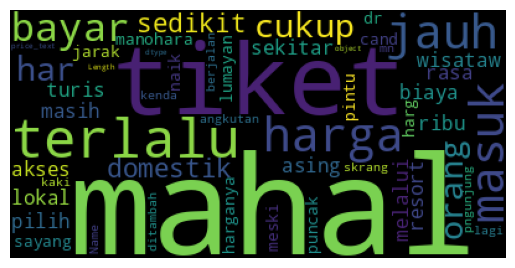

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(teks_negatif))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **LDA Topic Modelling**

In [61]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens
tokens_negatif = [tokenisasi(t) for t in teks_negatif]
print(tokens_negatif)

[['harga', 'tiket', 'cukup', 'mahal', 'sekitar', 'ribu', 'orang', 'harga', 'tiket', 'cukup', 'mahal', 'sekitar', 'ribu', 'orang', 'harga', 'tiket', 'cukup', 'mahal', 'sekitar', 'ribu', 'orang'], ['harga', 'tiket', 'domestik', 'masih', 'cukup', 'mahal', 'wisatawan', 'rp', 'sebanding', 'fasilitas', 'penataan', 'harga', 'tiket', 'domestik', 'masih', 'cukup', 'mahal', 'wisatawan', 'rp', 'sebanding', 'fasilitas', 'penataan', 'tempat', 'wisata', 'bagus', 'kabupaten', 'magelang', 'tapi', 'sayang', 'harga', 'tiket', 'domestik', 'masih', 'cukup', 'mahal', 'wisatawan', 'rp', 'sebanding', 'fasilitas', 'penataan'], ['biaya', 'tiket', 'lokal', 'turis', 'asing', 'jauh', 'mahal', 'rasa', 'biaya', 'masuk', 'turis', 'terlalu', 'berlebihan', 'tidka', 'worth', 'it', 'fasilitas', 'diberikan', 'turis', 'lokal', 'membayar', 'rp', 'itu', 'diberi', 'akses', 'berkeliling', 'halaman', 'saja', 'worth', 'it', 'harga', 'segitu', 'jika', 'ingin', 'akses', 'menaiki', 'candi', 'membayar', 'rp', 'per', 'orang', 'menda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens_negatif)
# Create Corpus
# Term Frequency
corpus = [id2word.doc2bow(text) for text in tokens_negatif]
# View
print(id2word)
print(corpus[:1])

Dictionary<796 unique tokens: ['cukup', 'harga', 'mahal', 'orang', 'ribu']...>
[[(0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3)]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('cukup', 3),
  ('harga', 3),
  ('mahal', 3),
  ('orang', 3),
  ('ribu', 3),
  ('sekitar', 3),
  ('tiket', 3)]]

In [64]:
# Build LDA model
import gensim
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=5,random_state=100,chunksize=100,passes=10,per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,chunksize=100,passes=10,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


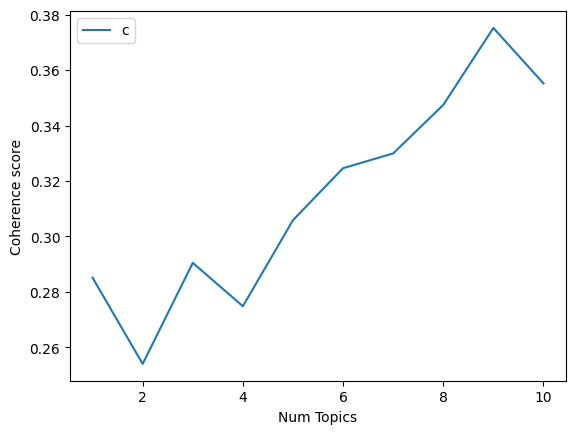

coherence_values:  [0.28512452510458275, 0.25403113413174605, 0.29048077887037355, 0.2748458235101311, 0.30587615377625776, 0.3246318685433086, 0.3299465545246799, 0.34744331903105125, 0.3752075535419475, 0.3552037928123212]


In [66]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(id2word, corpus, tokens_negatif, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
print("coherence_values: ", coherence_values)

In [67]:
lda_model.print_topics() #num_word default is 10
#lda_model.show_topics() #ini juga bisa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.027*"tapi" + 0.025*"mahal" + 0.023*"harga" + 0.019*"parkir" + 0.018*"tiket" + 0.016*"utk" + 0.012*"murah" + 0.012*"rb" + 0.011*"pengunjung" + 0.011*"cukup"'),
 (1,
  '0.035*"naik" + 0.033*"mahal" + 0.031*"candi" + 0.022*"harga" + 0.020*"lagi" + 0.016*"masuk" + 0.016*"tiket" + 0.013*"bayar" + 0.012*"tapi" + 0.012*"jauh"'),
 (2,
  '0.060*"tiket" + 0.054*"mahal" + 0.048*"harga" + 0.022*"candi" + 0.017*"terlalu" + 0.017*"masuk" + 0.011*"masih" + 0.011*"lumayan" + 0.011*"cukup" + 0.010*"rb"'),
 (3,
  '0.041*"rb" + 0.021*"candi" + 0.021*"mahal" + 0.020*"borobudur" + 0.017*"tiket" + 0.016*"masuk" + 0.016*"anak" + 0.016*"rbu" + 0.016*"dewasa" + 0.015*"naik"'),
 (4,
  '0.030*"masuk" + 0.023*"rb" + 0.022*"naik" + 0.021*"atas" + 0.020*"bayar" + 0.014*"harus" + 0.013*"sekarang" + 0.012*"mahal" + 0.011*"orang" + 0.011*"saja"')]

In [68]:
print("Topic distribution for document :", " ".join(tokens_negatif[0]))
print("feature of each token:", [(id2word[id], freq) for id, freq in corpus[0]])
lda_model.get_document_topics(corpus[0])

Topic distribution for document : harga tiket cukup mahal sekitar ribu orang harga tiket cukup mahal sekitar ribu orang harga tiket cukup mahal sekitar ribu orang
feature of each token: [('cukup', 3), ('harga', 3), ('mahal', 3), ('orang', 3), ('ribu', 3), ('sekitar', 3), ('tiket', 3)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(2, 0.76389295), (3, 0.20841114)]

In [69]:
import pandas as pd
def format_topics_sentences(ldamodel, corpus, texts):
      # Init output
      sent_topics_df = pd.DataFrame()

      # Get main topic in each document
      for i, row in enumerate(ldamodel[corpus]):
          row = sorted(row[0], key=lambda x: (x[1]), reverse=True)   # tambahkan indeks [0] pada variabel row

          # Get the Dominant topic, Perc Contribution and Keywords for each document
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0: # => dominant topic
                   wp = ldamodel.show_topic(topic_num, 5) #get most  significant topic
                   topic_keywords = ", ".join([word for word, prop in wp])
                   sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                   break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      # Add original text to the end of the output
      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokens_negatif)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic Keywords', 'Text']

#Save to csv
df_dominant_topic.to_csv('/content/drive/MyDrive/Colab Notebooks/doc_topic_dominant_price_negative.csv')
# Show
df_dominant_topic.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-69-ac6b6863ce52>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-69-ac6b6863ce52>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-69-ac6b6863ce52>:15: FutureWarning: The 

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               2              0.7639   
1            1               2              0.9802   
2            2               1              0.9930   
3            3               1              0.9831   
4            4               1              0.8977   

                        Topic Keywords  \
0  tiket, mahal, harga, candi, terlalu   
1  tiket, mahal, harga, candi, terlalu   
2      naik, mahal, candi, harga, lagi   
3      naik, mahal, candi, harga, lagi   
4      naik, mahal, candi, harga, lagi   

                                                Text  
0  [harga, tiket, cukup, mahal, sekitar, ribu, or...  
1  [harga, tiket, domestik, masih, cukup, mahal, ...  
2  [biaya, tiket, lokal, turis, asing, jauh, maha...  
3  [akses, masuk, pilih, melalui, resort, manohar...  
4  [meski, bayar, sedikit, mahal, bayar, sedikit,...

In [70]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens_negatif, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.30587615377625776


In [71]:
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Per Topic Score: ', coherence_per_topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Per Topic Score:  [0.40592729259942606, 0.2453887647381444, 0.2757627233255463, 0.29889862696950303, 0.30340336124866907]


In [ ]:
pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


In [ ]:
pip install pandas==1.5.3

In [ ]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.035235  0.011525       1        1  27.117104
2     -0.137538 -0.110365       2        1  21.844941
4      0.148427  0.021818       3        1  20.620316
3      0.089899 -0.083386       4        1  16.122783
0     -0.065553  0.160408       5        1  14.294856, topic_info=      Term        Freq       Total Category  logprob  loglift
6    tiket  119.000000  119.000000  Default  30.0000  30.0000
261   lagi   32.000000   32.000000  Default  29.0000  29.0000
17    tapi   48.000000   48.000000  Default  28.0000  28.0000
133   anak   23.000000   23.000000  Default  27.0000  27.0000
146     rb   89.000000   89.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
146     rb    8.217284   89.186550   Topic5  -4.4463  -0.4392
161   beli    5.019727   22.128691   Topic5  -4.9392   0.4618
255  harus    5.422150   37.259454   Topic5  -4.8620   0.0179
136   area    4.203564   12.826540   Topic5  -5.1166   0.8297
26   candi    4.371005   85.974294   Topic5  -5.0775  -1.0338

[330 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
558       2  0.871909  accept
87        1  0.504186    agak
87        3  0.229176    agak
87        4  0.229176    agak
739       4  0.884422     agk
...     ...       ...     ...
51        1  0.923718   worth
309       1  0.150760      ya
309       2  0.452279      ya
309       3  0.251266      ya
309       4  0.150760      ya

[460 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])